# import

In [32]:
# from google.colab import drive
# drive.mount('/content/drive')

In [33]:
from sklearn.preprocessing import StandardScaler

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import warnings

warnings.filterwarnings('ignore')

from datetime import datetime

# 데이터 로딩 

In [71]:
df_weather=pd.read_csv('./weather_0613.csv', encoding='cp949')

df_weather.shape

(27390, 7)

# 데이터 전처리

In [72]:
# 데이터 인포 확인
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27390 entries, 0 to 27389
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지점          27390 non-null  int64  
 1   지점명         27390 non-null  object 
 2   일시          27390 non-null  object 
 3   평균기온(°C)    27386 non-null  float64
 4   최저기온(°C)    27388 non-null  float64
 5   최고기온(°C)    27390 non-null  float64
 6   평균 풍속(m/s)  27375 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.5+ MB


In [74]:
# 일시 object -> datetimme으로 바꾸기
df_weather['일시']=pd.to_datetime(df_weather['일시'], format="%Y-%m-%d")
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27390 entries, 0 to 27389
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   지점          27390 non-null  int64         
 1   지점명         27390 non-null  object        
 2   일시          27390 non-null  datetime64[ns]
 3   평균기온(°C)    27386 non-null  float64       
 4   최저기온(°C)    27388 non-null  float64       
 5   최고기온(°C)    27390 non-null  float64       
 6   평균 풍속(m/s)  27375 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 1.5+ MB


In [75]:
# 데이터 컬럼명 확인
df_weather.columns

Index(['지점', '지점명', '일시', '평균기온(°C)', '최저기온(°C)', '최고기온(°C)', '평균 풍속(m/s)'], dtype='object')

In [76]:
# 분석에 사용할 사용 안 할 컬럼 drop
df_분석 = df_weather.drop('지점', axis=1)

In [77]:
# 분석에 사용할 데이터 확인
df_분석.info()
# df_.describe()  #  정수/실수 타입 컬럼 정보 조회

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27390 entries, 0 to 27389
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   지점명         27390 non-null  object        
 1   일시          27390 non-null  datetime64[ns]
 2   평균기온(°C)    27386 non-null  float64       
 3   최저기온(°C)    27388 non-null  float64       
 4   최고기온(°C)    27390 non-null  float64       
 5   평균 풍속(m/s)  27375 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 1.3+ MB


In [78]:
df_분석['지점명'].value_counts()

춘천    1826
강릉    1826
서울    1826
수원    1826
청주    1826
대전    1826
안동    1826
대구    1826
전주    1826
울산    1826
광주    1826
부산    1826
목포    1826
여수    1826
제주    1826
Name: 지점명, dtype: int64

결측치 처리
- 기온 결측치 삭제



In [79]:
df_분석.isnull().sum() #결측치 확인

지점명            0
일시             0
평균기온(°C)       4
최저기온(°C)       2
최고기온(°C)       0
평균 풍속(m/s)    15
dtype: int64

In [80]:
# 나머지 데이터는 .. 다 버릴까
df_분석.dropna(inplace=True)
df_분석.isnull().sum() #결측치 확인

지점명           0
일시            0
평균기온(°C)      0
최저기온(°C)      0
최고기온(°C)      0
평균 풍속(m/s)    0
dtype: int64

원하는 컬럼 더 파생변수로 추가

In [81]:
X_파생 = df_분석

체감온도 계산

In [82]:
X_파생['체감 기온(°C)'] = 13.12 + 0.6215 * X_파생['평균기온(°C)'] - 11.37 * X_파생['평균 풍속(m/s)']**0.16 + 0.3965 * X_파생['평균기온(°C)'] * X_파생['평균 풍속(m/s)']**0.16

계절감 추가 위해

In [84]:
X_파생

,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),평균 풍속(m/s),체감 기온(°C),sin
0,춘천,2018-06-14,20.1,18.7,23.1,2.0,21.812983,None
1,춘천,2018-06-15,19.6,15.7,23.4,3.1,20.988678,None
2,춘천,2018-06-16,21.2,13.4,29.4,1.5,23.132924,None
3,춘천,2018-06-17,22.3,16.5,27.9,1.0,24.451400,None
4,춘천,2018-06-18,24.4,18.0,32.0,1.4,26.495426,None
...,...,...,...,...,...,...,...,...
27385,제주,2023-06-09,22.3,18.6,26.5,2.4,24.071282,None
27386,제주,2023-06-10,23.8,19.8,30.0,2.8,25.632174,None
27387,제주,2023-06-11,21.9,19.5,25.3,2.4,23.640235,None
27388,제주,2023-06-12,22.2,20.0,25.2,2.2,24.004358,None


In [86]:
import pandas as pd
from datetime import datetime
import numpy as np

dfs = []  # 데이터프레임을 저장할 리스트

for i in [2018, 2019, 2020, 2021, 2022, 2023]:
    # 시작 날짜와 끝 날짜 설정
    start_date = datetime(i, 1, 1)
    end_date = datetime(i, 12, 31)

    # 날짜 범위 생성
    date_range = pd.date_range(start=start_date, end=end_date, freq='D')
    # x 값 범위 설정
    x = np.linspace(0, len(date_range), len(date_range))

    # y 값 계산
    y = np.sin((2 * np.pi * x) / len(date_range))

    # 데이터프레임 생성
    df = pd.DataFrame({'x': date_range, 'y': y})
    dfs.append(df)  # 데이터프레임을 리스트에 추가

# 모든 데이터프레임을 하나로 합치기
combined_df = pd.concat(dfs, ignore_index=True)

X_파생['sin'] = None

# 각 행을 순회하며 조건과 비교하여 열 추가
for index, row in X_파생.iterrows():
    mask = combined_df['x'] == row['일시']
    if any(mask):  # 조건에 맞는 행이 하나 이상 있는지 확인
        X_파생.loc[index, 'sin'] = combined_df.loc[mask, 'y'].values[0]
    else:
        pass

In [87]:
X_파생.loc[abs(X_파생['sin']) < 0.5 , 'sin'] = 0

In [88]:
X_파생[350:]

,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),평균 풍속(m/s),체감 기온(°C),sin
350,춘천,2019-05-30,19.5,10.7,26.3,1.8,21.242232,0.53932
351,춘천,2019-05-31,20.4,17.0,25.1,2.6,21.975154,0.524704
352,춘천,2019-06-01,19.1,11.8,25.4,1.7,20.857366,0.509933
353,춘천,2019-06-02,21.5,13.8,29.2,1.4,23.479626,0
354,춘천,2019-06-03,22.4,14.4,29.8,1.4,24.415564,0
...,...,...,...,...,...,...,...,...
27385,제주,2023-06-09,22.3,18.6,26.5,2.4,24.071282,0
27386,제주,2023-06-10,23.8,19.8,30.0,2.8,25.632174,0
27387,제주,2023-06-11,21.9,19.5,25.3,2.4,23.640235,0
27388,제주,2023-06-12,22.2,20.0,25.2,2.2,24.004358,0


In [89]:
# 확인용
X_파생[X_파생['일시']=='2022-9-30']

,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),평균 풍속(m/s),체감 기온(°C),sin
1569,춘천,2022-09-30,18.2,14.6,26.3,1.0,20.277600,-0.999851
3395,강릉,2022-09-30,23.9,18.0,30.8,2.0,25.858099,-0.999851
5221,서울,2022-09-30,20.7,14.8,27.7,1.6,22.575611,-0.999851
7047,수원,2022-09-30,19.9,13.5,28.1,1.0,22.008200,-0.999851
8873,청주,2022-09-30,20.1,13.6,28.6,0.7,22.400418,-0.999851
10699,대전,2022-09-30,19.4,13.0,29.2,1.1,21.442684,-0.999851
12525,안동,2022-09-30,18.2,12.7,28.0,0.7,20.508006,-0.999851
14351,대구,2022-09-30,21.6,14.1,31.2,0.9,23.785699,-0.999851
16177,전주,2022-09-30,20.9,14.3,28.8,1.0,23.026200,-0.999851
18003,울산,2022-09-30,20.8,15.3,28.0,0.9,22.976602,-0.999851


In [90]:
X_파생['dif'] = X_파생['최저기온(°C)'] - X_파생['최고기온(°C)']

In [91]:
# 평균 풍속과 체감기온의 차이 확인용
X_파생[X_파생['평균 풍속(m/s)']> 10]

,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),평균 풍속(m/s),체감 기온(°C),sin,dif
21561,부산,2022-06-28,23.7,23.3,24.7,10.1,24.993226,0,-1.4
21562,부산,2022-06-29,24.1,23.0,25.0,10.5,25.455064,0,-2.0
22842,목포,2020-12-30,-3.0,-4.5,0.2,10.1,-6.927426,0,-4.7
23202,목포,2021-12-25,-2.6,-5.4,1.2,10.4,-6.533491,0,-6.6
23457,목포,2022-09-06,21.7,19.1,24.6,10.1,22.602166,-0.908324,-5.5
23470,목포,2022-09-19,23.0,20.6,25.7,10.7,24.126132,-0.978624,-5.1
23498,목포,2022-10-17,14.1,12.1,16.5,10.4,13.476861,-0.962103,-4.4
23541,목포,2022-11-29,10.3,4.9,18.8,10.4,8.923607,-0.524704,-13.9
23565,목포,2022-12-23,-2.7,-4.7,-1.0,10.1,-6.568767,0,-3.7
23597,목포,2023-01-24,-6.5,-8.1,-0.3,12.0,-11.676415,0,-7.8


In [92]:
X_=X_파생.drop(['평균기온(°C)', '최저기온(°C)', '최고기온(°C)', '평균 풍속(m/s)'], axis=1)

In [93]:
X_

,지점명,일시,체감 기온(°C),sin,dif
0,춘천,2018-06-14,21.812983,0,-4.4
1,춘천,2018-06-15,20.988678,0,-7.7
2,춘천,2018-06-16,23.132924,0,-16.0
3,춘천,2018-06-17,24.451400,0,-11.4
4,춘천,2018-06-18,26.495426,0,-14.0
...,...,...,...,...,...
27385,제주,2023-06-09,24.071282,0,-7.9
27386,제주,2023-06-10,25.632174,0,-10.2
27387,제주,2023-06-11,23.640235,0,-5.8
27388,제주,2023-06-12,24.004358,0,-5.2


그래프 그릴시 한글이 깨지는 오류를 못 잡음
그래서 영어로 그냥 변경

In [94]:
# 컬럼 이름 변경
X_.rename(columns={'일시': 'day'}, inplace=True)
X_.rename(columns={'지점명': 'area'}, inplace=True)
X_.rename(columns={'체감 기온(°C)': 'ap_tmp'}, inplace=True)

In [95]:
import pandas as pd

# CSV 파일로 저장
X_.to_csv('pre_weather_0613.csv', index=False)

# 모델 예측

In [96]:
from sklearn.preprocessing import StandardScaler

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import warnings

warnings.filterwarnings('ignore')

from datetime import datetime

In [97]:
X_=pd.read_csv('./pre_weather_0613.csv')
X_.shape

(27369, 5)

In [99]:
X_

,area,day,ap_tmp,sin,dif
0,춘천,2018-06-14,21.812983,0.0,-4.4
1,춘천,2018-06-15,20.988678,0.0,-7.7
2,춘천,2018-06-16,23.132924,0.0,-16.0
3,춘천,2018-06-17,24.451400,0.0,-11.4
4,춘천,2018-06-18,26.495426,0.0,-14.0
...,...,...,...,...,...
27364,제주,2023-06-09,24.071282,0.0,-7.9
27365,제주,2023-06-10,25.632174,0.0,-10.2
27366,제주,2023-06-11,23.640235,0.0,-5.8
27367,제주,2023-06-12,24.004358,0.0,-5.2


스케일링

In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
X_.columns

Index(['area', 'day', 'ap_tmp', 'sin', 'dif'], dtype='object')

In [102]:
cols=['ap_tmp', 'sin', 'dif']

In [103]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_[cols])
X_[cols] = X_scaled
X_.head()

,area,day,ap_tmp,sin,dif
0,춘천,2018-06-14,0.602081,-0.00024,1.288326
1,춘천,2018-06-15,0.520280,-0.00024,0.381980
2,춘천,2018-06-16,0.733066,-0.00024,-1.897619
3,춘천,2018-06-17,0.863905,-0.00024,-0.634227
4,춘천,2018-06-18,1.066745,-0.00024,-1.348318


분석

In [104]:
df_area = X_[['area', 'day']]

In [105]:
X_

,area,day,ap_tmp,sin,dif
0,춘천,2018-06-14,0.602081,-0.00024,1.288326
1,춘천,2018-06-15,0.520280,-0.00024,0.381980
2,춘천,2018-06-16,0.733066,-0.00024,-1.897619
3,춘천,2018-06-17,0.863905,-0.00024,-0.634227
4,춘천,2018-06-18,1.066745,-0.00024,-1.348318
...,...,...,...,...,...
27364,제주,2023-06-09,0.826184,-0.00024,0.327050
27365,제주,2023-06-10,0.981080,-0.00024,-0.304646
27366,제주,2023-06-11,0.783409,-0.00024,0.903816
27367,제주,2023-06-12,0.819543,-0.00024,1.068606


In [106]:
df_area

,area,day
0,춘천,2018-06-14
1,춘천,2018-06-15
2,춘천,2018-06-16
3,춘천,2018-06-17
4,춘천,2018-06-18
...,...,...
27364,제주,2023-06-09
27365,제주,2023-06-10
27366,제주,2023-06-11
27367,제주,2023-06-12


In [107]:
X_

,area,day,ap_tmp,sin,dif
0,춘천,2018-06-14,0.602081,-0.00024,1.288326
1,춘천,2018-06-15,0.520280,-0.00024,0.381980
2,춘천,2018-06-16,0.733066,-0.00024,-1.897619
3,춘천,2018-06-17,0.863905,-0.00024,-0.634227
4,춘천,2018-06-18,1.066745,-0.00024,-1.348318
...,...,...,...,...,...
27364,제주,2023-06-09,0.826184,-0.00024,0.327050
27365,제주,2023-06-10,0.981080,-0.00024,-0.304646
27366,제주,2023-06-11,0.783409,-0.00024,0.903816
27367,제주,2023-06-12,0.819543,-0.00024,1.068606


In [108]:
X=X_.drop(['area', 'day'], axis=1)

In [109]:
X.head()

,ap_tmp,sin,dif
0,0.602081,-0.00024,1.288326
1,0.520280,-0.00024,0.381980
2,0.733066,-0.00024,-1.897619
3,0.863905,-0.00024,-0.634227
4,1.066745,-0.00024,-1.348318


# k 값

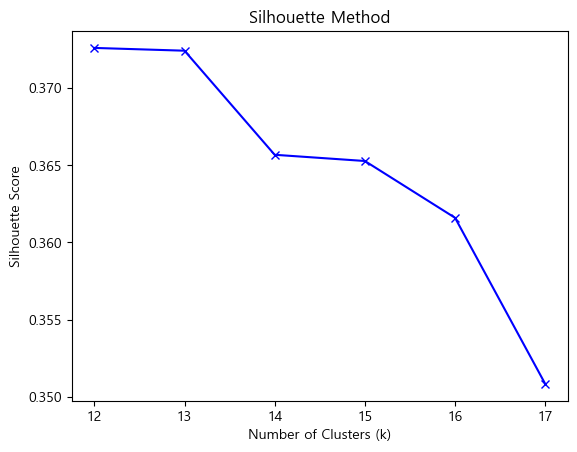

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 데이터 준비

# 가중치 설정
weights = [0.6, 0.3, 0.1]  # 각 열에 대한 가중치 설정

# weights = [1, 1, 1]

# 데이터셋에 가중치 적용
weighted_data = X * weights

# 클러스터의 개수(k) 범위 설정
k_values = range(12, 18)
silhouette_scores = []

# k 값에 따른 실루엣 계수 계산
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(weighted_data)
    labels = kmeans.labels_
    score = silhouette_score(weighted_data, labels)
    silhouette_scores.append(score)

# 실루엣 계수 그래프 그리기
plt.plot(k_values, silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

In [112]:
from sklearn.cluster import KMeans

# 가중치 설정
weights = [0.6, 0.3, 0.1]  # 각 열에 대한 가중치 설정

# KMeans 모델 초기화
km_model = KMeans(n_clusters=16, random_state=0)

# 데이터셋에 가중치 적용
weighted_data = X * weights

# 클러스터링 모델 훈련
kmeans_model = km_model.fit(weighted_data)

# 클러스터링 결과 확인
labels = kmeans_model.labels_
centroids = kmeans_model.cluster_centers_

# 결과 출력 또는 저장 등 추가 작업 수행
print("Labels:", labels)
print("Centroids:", centroids)


Labels: [7 7 7 ... 7 7 7]
Centroids: [[ 8.28495869e-01  2.51547724e-03  1.91718656e-02]
 [-4.01265131e-01  3.96046513e-04  3.07875953e-02]
 [-3.76063293e-02 -3.73964838e-01 -2.60167782e-02]
 [-8.48058841e-01  2.99363796e-01 -7.67920012e-03]
 [ 6.14769108e-02  3.86566798e-01 -4.12542794e-02]
 [-5.11238742e-01  3.69741143e-01 -2.77925628e-02]
 [ 2.78540504e-01 -4.21218727e-01  2.11226134e-02]
 [ 5.01121013e-01  4.64317428e-04  4.77427675e-02]
 [ 8.66749781e-01 -2.98736502e-01  4.88229107e-02]
 [-9.60182918e-01 -5.17840558e-03 -9.31407135e-03]
 [ 5.67688108e-01 -3.92712864e-01  5.84641960e-02]
 [ 3.67292489e-01  3.10302778e-01 -5.53816941e-02]
 [-1.31417657e+00  5.86760972e-02  2.52624600e-03]
 [-3.50406566e-01 -3.16974252e-01 -4.19390093e-02]
 [-2.30231179e-01  4.10462477e-01 -4.25324178e-02]
 [-6.90455061e-01 -2.65681424e-02  6.66828209e-03]]


In [136]:
import pickle

# K-means 모델 저장
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(km_model, f)

# 스케일러 저장
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [113]:
X_

,area,day,ap_tmp,sin,dif
0,춘천,2018-06-14,0.602081,-0.00024,1.288326
1,춘천,2018-06-15,0.520280,-0.00024,0.381980
2,춘천,2018-06-16,0.733066,-0.00024,-1.897619
3,춘천,2018-06-17,0.863905,-0.00024,-0.634227
4,춘천,2018-06-18,1.066745,-0.00024,-1.348318
...,...,...,...,...,...
27364,제주,2023-06-09,0.826184,-0.00024,0.327050
27365,제주,2023-06-10,0.981080,-0.00024,-0.304646
27366,제주,2023-06-11,0.783409,-0.00024,0.903816
27367,제주,2023-06-12,0.819543,-0.00024,1.068606


In [114]:
X_['label'] = labels

In [116]:
X_[330:]

,area,day,ap_tmp,sin,dif,label
330,춘천,2019-05-10,0.427296,1.156224,-3.463126,11
331,춘천,2019-05-11,0.619041,1.140689,-2.776500,11
332,춘천,2019-05-12,0.626217,1.124814,-1.870154,11
333,춘천,2019-05-13,0.457877,1.108604,0.134794,11
334,춘천,2019-05-14,0.556845,1.092064,-1.650433,11
...,...,...,...,...,...,...
27364,제주,2023-06-09,0.826184,-0.000240,0.327050,7
27365,제주,2023-06-10,0.981080,-0.000240,-0.304646,7
27366,제주,2023-06-11,0.783409,-0.000240,0.903816,7
27367,제주,2023-06-12,0.819543,-0.000240,1.068606,7


In [117]:
X_[465:]

,area,day,ap_tmp,sin,dif,label
465,춘천,2019-09-25,0.484101,-1.451723,-0.634227,6
466,춘천,2019-09-26,0.663456,-1.454111,-0.853947,6
467,춘천,2019-09-27,0.673421,-1.456066,-0.277181,6
468,춘천,2019-09-28,0.793190,-1.457586,-0.579297,10
469,춘천,2019-09-29,0.621453,-1.458673,-0.936342,6
...,...,...,...,...,...,...
27364,제주,2023-06-09,0.826184,-0.000240,0.327050,7
27365,제주,2023-06-10,0.981080,-0.000240,-0.304646,7
27366,제주,2023-06-11,0.783409,-0.000240,0.903816,7
27367,제주,2023-06-12,0.819543,-0.000240,1.068606,7


In [118]:
X_['label'].value_counts()

7     2586
10    2275
14    2219
4     2056
0     1997
2     1967
15    1866
5     1809
11    1757
8     1689
6     1627
9     1441
13    1306
3     1066
1      955
12     753
Name: label, dtype: int64

In [120]:
for i in range(16):
    print(i)
    print(X_[X_['label'] ==i ]['ap_tmp'].agg(['min', 'max']))

0
min    1.086153
max    2.022618
Name: ap_tmp, dtype: float64
1
min   -0.926834
max   -0.020396
Name: ap_tmp, dtype: float64
2
min   -0.355784
max    0.241227
Name: ap_tmp, dtype: float64
3
min   -1.940728
max   -1.090526
Name: ap_tmp, dtype: float64
4
min   -0.147939
max    0.394294
Name: ap_tmp, dtype: float64
5
min   -1.170758
max   -0.591473
Name: ap_tmp, dtype: float64
6
min    0.160675
max    0.737626
Name: ap_tmp, dtype: float64
7
min    0.159439
max    1.127848
Name: ap_tmp, dtype: float64
8
min    1.140827
max    2.072568
Name: ap_tmp, dtype: float64
9
min   -1.923895
max   -1.355403
Name: ap_tmp, dtype: float64
10
min    0.677407
max    1.235012
Name: ap_tmp, dtype: float64
11
min    0.316212
max    1.244315
Name: ap_tmp, dtype: float64
12
min   -3.345903
max   -1.863457
Name: ap_tmp, dtype: float64
13
min   -1.107169
max   -0.292875
Name: ap_tmp, dtype: float64
14
min   -0.640853
max   -0.134729
Name: ap_tmp, dtype: float64
15
min   -1.406184
max   -0.883459
Name: ap_tmp, d

In [123]:
X_

,area,day,ap_tmp,sin,dif,label
0,춘천,2018-06-14,0.602081,-0.00024,1.288326,7
1,춘천,2018-06-15,0.520280,-0.00024,0.381980,7
2,춘천,2018-06-16,0.733066,-0.00024,-1.897619,7
3,춘천,2018-06-17,0.863905,-0.00024,-0.634227,7
4,춘천,2018-06-18,1.066745,-0.00024,-1.348318,7
...,...,...,...,...,...,...
27364,제주,2023-06-09,0.826184,-0.00024,0.327050,7
27365,제주,2023-06-10,0.981080,-0.00024,-0.304646,7
27366,제주,2023-06-11,0.783409,-0.00024,0.903816,7
27367,제주,2023-06-12,0.819543,-0.00024,1.068606,7


In [124]:
X_.columns

Index(['area', 'day', 'ap_tmp', 'sin', 'dif', 'label'], dtype='object')

In [125]:
X_results=X_.drop(['ap_tmp', 'sin', 'dif'], axis=1)

In [126]:
X_results

,area,day,label
0,춘천,2018-06-14,7
1,춘천,2018-06-15,7
2,춘천,2018-06-16,7
3,춘천,2018-06-17,7
4,춘천,2018-06-18,7
...,...,...,...
27364,제주,2023-06-09,7
27365,제주,2023-06-10,7
27366,제주,2023-06-11,7
27367,제주,2023-06-12,7


In [127]:
import pandas as pd

# CSV 파일로 저장
X_results.to_csv('label_weather_0613.csv', index=False)

In [129]:
X_results['day']

0        2018-06-14
1        2018-06-15
2        2018-06-16
3        2018-06-17
4        2018-06-18
            ...    
27364    2023-06-09
27365    2023-06-10
27366    2023-06-11
27367    2023-06-12
27368    2023-06-13
Name: day, Length: 27369, dtype: object

In [130]:
X_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27369 entries, 0 to 27368
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   area    27369 non-null  object
 1   day     27369 non-null  object
 2   label   27369 non-null  int32 
dtypes: int32(1), object(2)
memory usage: 534.7+ KB


In [131]:
X_results['day']=pd.to_datetime(X_results['day'], format="%Y-%m-%d")

In [132]:
X_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27369 entries, 0 to 27368
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   area    27369 non-null  object        
 1   day     27369 non-null  datetime64[ns]
 2   label   27369 non-null  int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 534.7+ KB


In [ ]:
X_results['day']

In [ ]:
import pandas as pd

# 데이터프레임 생성
data = pd.DataFrame({'Date': ['2020-01-01', '2020-01-15', '2020-02-01', '2020-02-15', '2020-03-01'],
                     'Value': [1, 2, 3, 4, 5]})

# 'Date' 열을 날짜 형식으로 변환
data['Date'] = pd.to_datetime(data['Date'])

# 조건에 해당하는 행 선택
filtered_data = data[(data['Date'] >= '2020-01-01') & (data['Date'] <= '2020-02-29')]

# 결과 출력
print(filtered_data)


In [133]:
filtered_data = X_results[(X_results['day'] >= '2022-06-15') & (X_results['day'] <= '2023-06-14')]

# 결과 출력
print(filtered_data)

      area        day  label
1459    춘천 2022-06-15      7
1460    춘천 2022-06-16      7
1461    춘천 2022-06-17      7
1462    춘천 2022-06-18      7
1463    춘천 2022-06-19      7
...    ...        ...    ...
27364   제주 2023-06-09      7
27365   제주 2023-06-10      7
27366   제주 2023-06-11      7
27367   제주 2023-06-12      7
27368   제주 2023-06-13      7

[5453 rows x 3 columns]


In [134]:
filtered_data

,area,day,label
1459,춘천,2022-06-15,7
1460,춘천,2022-06-16,7
1461,춘천,2022-06-17,7
1462,춘천,2022-06-18,7
1463,춘천,2022-06-19,7
...,...,...,...
27364,제주,2023-06-09,7
27365,제주,2023-06-10,7
27366,제주,2023-06-11,7
27367,제주,2023-06-12,7


In [135]:
filtered_data.to_csv('labels_weather_0613.csv', index=False)